# Kalman Filter   
an efficient recursive algorithm used to estimate the state of a dynamic system from a series of noisy measurements. It is widely used in fields like control systems, robotics, autonomous vehicles, economics, and signal processing.

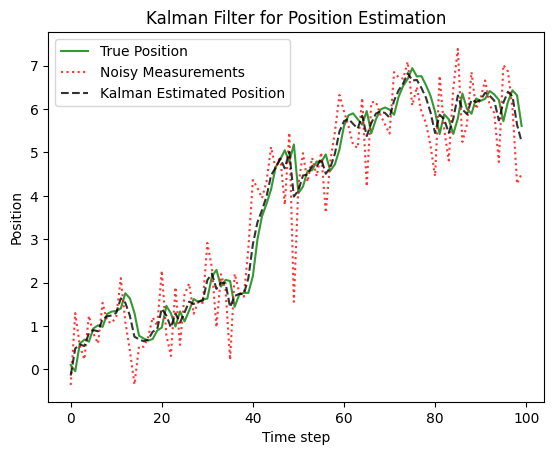

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables for the Kalman Filter
dt = 0.1  # Time step (seconds)
A = np.array([[1, dt], [0, 1]])  # State transition matrix
H = np.array([[1, 0]])  # Measurement matrix
Q = np.array([[1, 0], [0, 1]]) * 0.1  # Process noise covariance
R = np.array([[1]])  # Measurement noise covariance
B = np.array([[0.5 * dt**2], [dt]])  # Control input matrix (for acceleration)
u = np.array([[0]])  # Control input (acceleration)
x = np.array([[0], [1]])  # Initial state [position, velocity]
P = np.eye(2)  # Initial error covariance matrix

# Generate noisy measurements
num_steps = 100
true_positions = []
noisy_measurements = []
estimated_positions = []
estimated_velocities = []

for i in range(num_steps):
    # True position and velocity (without noise)
    true_position = A.dot(x)
    true_positions.append(true_position[0, 0])

    # Add measurement noise
    measurement = true_position[0, 0] + np.random.normal(0, 1)
    noisy_measurements.append(measurement)

    # Kalman Filter Prediction Step
    x = A.dot(x) + B.dot(u)  # Predict the next state
    P = A.dot(P).dot(A.T) + Q  # Predict the error covariance

    # Kalman Filter Correction Step
    z = np.array([[measurement]])  # Measurement at this step
    y = z - H.dot(x)  # Measurement residual
    S = H.dot(P).dot(H.T) + R  # Residual covariance
    K = P.dot(H.T).dot(np.linalg.inv(S))  # Kalman gain
    x = x + K.dot(y)  # Updated state estimate
    P = (np.eye(2) - K.dot(H)).dot(P)  # Updated error covariance

    # Store the estimated position and velocity
    estimated_positions.append(x[0, 0])
    estimated_velocities.append(x[1, 0])

# Plot results
plt.plot(true_positions, label="True Position", color='green', alpha=0.8)
plt.plot(noisy_measurements, label="Noisy Measurements", linestyle='dotted', color='red', alpha=0.8)
plt.plot(estimated_positions, label="Kalman Estimated Position", linestyle='--', color='black', alpha=0.8)
plt.legend()
plt.title("Kalman Filter for Position Estimation")
plt.xlabel("Time step")
plt.ylabel("Position")
plt.show()
